In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
from random import random
import math

In [3]:
def get_error(pct: float):
    src = 2 * random() - 1
    error = src * pct

    return error

In [4]:
W, H = 500, 500

anode_width = 0.25*W
anode_height = 0.5*H
anode_catode_width = 0.5*W
catode_width = 0.25*W

anode_width = anode_width * (1 + get_error(0.25))
anode_top_height = anode_height * (1 + get_error(0.5)) / 2
anode_bottom_height = anode_height * (1 + get_error(0.5)) / 2
anode_catode_width = anode_catode_width * (1 + get_error(0.25))
catode_width = catode_width * (1 + get_error(0.25))

anode_0 = np.array([0, anode_top_height])
anode_1 = anode_0 + np.array([anode_width, 0])
anode_1_top = anode_1 - np.array([0, anode_top_height])
anode_1_bottom = anode_1 + np.array([0, anode_bottom_height])
catode_0 = anode_1 + np.array([anode_catode_width, 0])
catode_1 = catode_0 + np.array([catode_width, 0])

anode_0 = tuple(anode_0)
anode_1 = tuple(anode_1)
anode_1_top = tuple(anode_1_top)
anode_1_bottom = tuple(anode_1_bottom)
catode_0 = tuple(catode_0)
catode_1 = tuple(catode_1)

nW = math.ceil(min(W, anode_width + anode_catode_width + catode_width))
nH = math.ceil(min(H, anode_top_height + anode_bottom_height))
img = Image.new("RGBA", (nW, nH))
draw = ImageDraw.Draw(img)


draw.line([anode_0, anode_1], fill="black")
draw.line([anode_1, anode_1_top], fill="black")
draw.line([anode_1, anode_1_bottom], fill="black")
draw.line([anode_1_top, catode_0], fill="black")
draw.line([anode_1_bottom, catode_0], fill="black")
draw.line([catode_0, catode_1], fill="black")

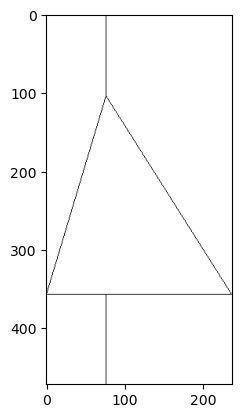

In [5]:
img.save('test.png')
data = np.asarray(img.rotate(90, expand=True))
plt.imshow(data)

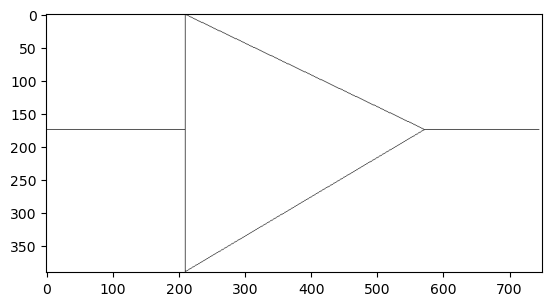

In [39]:
from generators.diode_generator import DiodeGenerator

diode_generator = DiodeGenerator()
data = diode_generator.generate(750)

plt.imshow(data)

In [5]:
import torch
from torch import nn
from util.get_padded_queries import get_padded_queries

n_model = 5
query_embeddings = nn.ParameterList([torch.rand(i+1, 5) for i in range(10)])
indexes = torch.tensor([0, 1, 2, 3, 4, 5])

padded_queries, padding_masks = get_padded_queries(indexes, query_embeddings)

In [10]:
padded_queries, padding_masks, list(query_embeddings)

(tensor([[[0.0655, 0.4431, 0.0620, 0.1098, 0.3464],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
 
         [[0.1407, 0.4586, 0.4960, 0.3880, 0.8408],
          [0.8786, 0.7051, 0.0980, 0.6392, 0.6555],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
 
         [[0.4366, 0.1886, 0.2828, 0.9851, 0.5975],
          [0.0154, 0.7880, 0.6691, 0.3183, 0.5862],
          [0.4011, 0.5767, 0.3409, 0.8548, 0.6170],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
 
         [[0.3742, 0.8806, 0.4248, 0.7754, 0.6286],
   

In [11]:
indexes.shape, padded_queries.shape

(torch.Size([6]), torch.Size([6, 6, 5]))